In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## We will now continue to consider the case when K=3
* The queueing system is still G/M/s, with arrival rate being lambda1 during [0,t0], lambda2 during [t0,t1] and lambda3 during [t1,T]

In [2]:
# arrival rate
lambda1 = 2
lambda2 = 4
lambda3 = 8
arrival_rate = np.array([lambda1,lambda2,lambda3])

# service rate 
mu = 3

# total time, that is the office hour is from 8:00 am to 6:00 pm, and will not accept new customers half hour before the end
T = 10

# time for the change in influx
t0 = 5
t1 = 7

# let's consider the case when a new gate is open at time s1, i.e. there are two counter serving
### after which another new counter is opened at time s2, i.e., there are three counters serving
# the cost of operating one counter is c1 and two counters is c2 and three counters is c3, the upper bound for the daily cost is C
c1 = 5
c2 = 10
c3 = 15
C = 13
s1 = 6
s2 = 8

## For subsequent comparison, we first start with only one counter throughout [0,T], i.e., s1>T

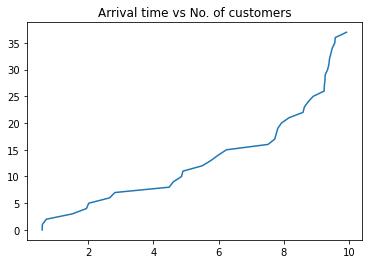

In [3]:
# For a single iteration of simulation
arrival_time=np.zeros([50,1])
# assign value of arrival time
n=0
while arrival_time[n]<10:
    if n==0:
        arrival_time[0]=np.random.exponential(1/lambda1)
        
    if arrival_time[n]<t0:
        arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda1)
    elif arrival_time[n]<t1:
        arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda2)
    else:
        arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda3)
    n+=1

arrival_time=arrival_time[arrival_time>0][0:n,None]
plt.figure()
plt.plot(arrival_time,range(n))
plt.title("Arrival time vs No. of customers")
plt.show()

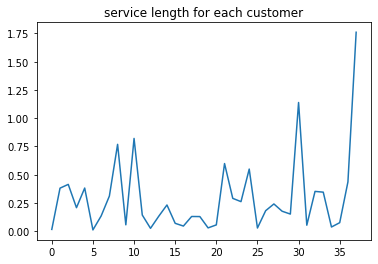

In [4]:
# service length
service_length=np.random.exponential(1/mu,[n,1])

plt.figure()
plt.plot(range(n),service_length)
plt.title("service length for each customer")
plt.show()

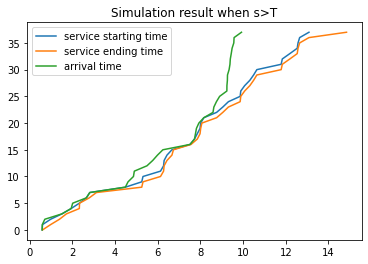

In [5]:
# service starting time & service ending time
# let's start with only one gate
service_start_time=np.zeros([n,1])
service_end_time=np.zeros([n,1])
for k in range(n):
    if k==0:
        service_start_time[k]=arrival_time[k]
    else:
        service_start_time[k]=max(arrival_time[k],service_end_time[k-1])
    service_end_time[k]=service_start_time[k]+service_length[k]
    
plt.figure()
plt.plot(service_start_time,range(n))
plt.plot(service_end_time,range(n))
plt.plot(arrival_time,range(n))
plt.title("Simulation result when s>T")
plt.legend(["service starting time","service ending time","arrival time"])
plt.show()

## Next, we will introduce the second counter at time s1

Found k


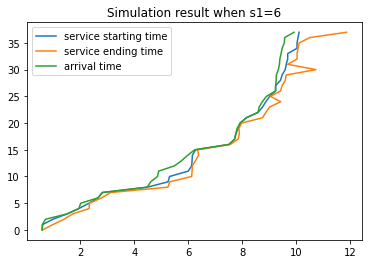

In [6]:
# new service start and ending time with new gate introduced
service_start_s1_time=np.zeros([n,1])
service_end_s1_time=np.zeros([n,1])
for k in range(n):
    if k==0:
        service_start_s1_time[k]=arrival_time[k]
    else:
        service_start_s1_time[k]=max(arrival_time[k],service_end_s1_time[k-1])
    service_end_s1_time[k]=service_start_s1_time[k]+service_length[k]
    if  service_end_s1_time[k]>=s1:
        print("Found k")
        break
        
service_start_s1_time[k+1]=max(s1,arrival_time[k+1])
service_end_s1_time[k+1]=service_start_s1_time[k+1]+service_length[k+1]
for j in range(k+2,n):
    service_start_s1_time[j]=max(arrival_time[j],min(service_end_s1_time[j-1],service_end_s1_time[j-2]))
    service_end_s1_time[j]=service_start_s1_time[j]+service_length[j]
    
plt.figure()
plt.plot(service_start_s1_time,range(n))
plt.plot(service_end_s1_time,range(n))
plt.plot(arrival_time,range(n))
plt.title("Simulation result when s1=6")
plt.legend(["service starting time","service ending time","arrival time"])
plt.show()

## Now, we will introduce the third counter at time s2

Found k
Found j


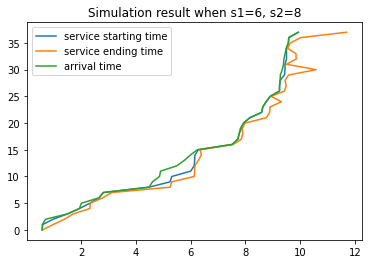

In [7]:
# new service start and ending time with another new gate introduced
service_start_s2_time=np.zeros([n,1])
service_end_s2_time=np.zeros([n,1])
for k in range(n):
    if k==0:
        service_start_s2_time[k]=arrival_time[k]
    else:
        service_start_s2_time[k]=max(arrival_time[k],service_end_s2_time[k-1])
    service_end_s2_time[k]=service_start_s2_time[k]+service_length[k]
    if  service_end_s2_time[k]>=s1:
        print("Found k")
        break
        
service_start_s2_time[k+1]=max(s1,arrival_time[k+1])
service_end_s2_time[k+1]=service_start_s2_time[k+1]+service_length[k+1]
for j in range(k+2,n):
    service_start_s2_time[j]=max(arrival_time[j],min(service_end_s2_time[j-1],service_end_s2_time[j-2]))
    service_end_s2_time[j]=service_start_s2_time[j]+service_length[j]
    if  service_end_s2_time[j]>=s2:
        print("Found j")
        break

service_start_s2_time[j+1]=max(s2,arrival_time[j+1])
service_end_s2_time[j+1]=service_start_s2_time[j+1]+service_length[j+1]
for h in range(j+2,n):
    service_start_s2_time[h]=max(arrival_time[h],min(service_end_s2_time[h-1],service_end_s2_time[h-2], service_end_s2_time[h-3]))
    service_end_s2_time[h]=service_start_s2_time[h]+service_length[h]
    
plt.figure()
plt.plot(service_start_s2_time,range(n))
plt.plot(service_end_s2_time,range(n))
plt.plot(arrival_time,range(n))
plt.title("Simulation result when s1=6, s2=8")
plt.legend(["service starting time","service ending time","arrival time"])
plt.show()

In [8]:
# waiting time with only one counter (s1>T)
waiting_time=service_start_time-arrival_time
Wq=np.sum(waiting_time)/len(waiting_time)
print(Wq)

#### waiting time given that second counter is opened at time s1 (s2>T)
waiting_s1_time=service_start_s1_time-arrival_time
total_service_s1_time=waiting_s1_time+service_length
Wq_s1=np.sum(waiting_s1_time)/len(waiting_s1_time)
print(Wq_s1)

# waiting time given that the third counter is opened at time s2
waiting_s2_time=service_start_s2_time-arrival_time
total_service_s2_time=waiting_s2_time+service_length
Wq_s2=np.sum(waiting_s2_time)/len(waiting_s2_time)
print(Wq_s2)

0.8547947436179509
0.19838064582656614
0.11863570507285053


The cell above compares the expected waiting time of iterations during which no counter, 1 counter and 2 counter are introduced respectively. As can be seen, the waiting time decreases with every additional counter opened. We continue with considering multiple iterations in the following sections.

## Average over multiple iterations given s to get more accurate waiting time

In [9]:
def GenerateTime(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7):
    '''
    generate the arrival time and the service length of each customer
    '''
    arrival_time=np.zeros([100,1])
    # assign value of arrival time
    n=0
    while arrival_time[n]<T:
        if n==0:
            arrival_time[0]=np.random.exponential(1/arrival_rate[1])

        if arrival_time[n]<t0:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/arrival_rate[0])
        elif arrival_time[n]<t1:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/arrival_rate[1])
        else:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/arrival_rate[2])
        n+=1

    arrival_time=arrival_time[arrival_time>0][0:n,None]
    # service length
    service_length=np.random.exponential(1/mu,[n,1])
    return (arrival_time,service_length)

In [10]:
def WaitingTimeS2(arrival_time,service_length,s1,s2):
    '''
     compute the expected waiting time in queue when the new gate is introduced at s
    '''
    n=np.shape(arrival_time)[0]
    service_start_s2_time=np.zeros([n,1])
    service_end_s2_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_start_s2_time[k]=arrival_time[k]
        else:
            service_start_s2_time[k]=max(arrival_time[k],service_end_s2_time[k-1])
        service_end_s2_time[k]=service_start_s2_time[k]+service_length[k]
        if  service_end_s2_time[k]>=s1:
            break
    if k+1<n:
        service_start_s2_time[k+1]=max(s1,arrival_time[k+1])
        service_end_s2_time[k+1]=service_start_s2_time[k+1]+service_length[k+1]
        if (k+2)==n:
            j=n
        else:
            for j in range(k+2,n):
                service_start_s2_time[j]=max(arrival_time[j],min(service_end_s2_time[j-1],service_end_s2_time[j-2]))
                service_end_s2_time[j]=service_start_s2_time[j]+service_length[j]
                if  service_end_s2_time[j]>=s2:
                    break
        if j+1<n:
            service_start_s2_time[j+1]=max(s2,arrival_time[j+1])
            service_end_s2_time[j+1]=service_start_s2_time[j+1]+service_length[j+1]
            for h in range(j+2,n):
                service_start_s2_time[h]=max(arrival_time[h],min(service_end_s2_time[h-1],service_end_s2_time[h-2],service_end_s2_time[h-3]))
                service_end_s2_time[h]=service_start_s2_time[h]+service_length[h]

    waiting_s2_time=service_start_s2_time-arrival_time   
    Wq_s2=np.sum(waiting_s2_time)/len(waiting_s2_time)
    
    return Wq_s2

In [11]:
def WaitingTimeS1(arrival_time,service_length,s1):
    '''
     compute the expected waitng time in queue when the new gate is introduced at s
    '''
    n=np.shape(arrival_time)[0]
    service_start_s1_time=np.zeros([n,1])
    service_end_s1_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_start_s1_time[k]=arrival_time[k]
        else:
            service_start_s1_time[k]=max(arrival_time[k],service_end_s1_time[k-1])
        service_end_s1_time[k]=service_start_s1_time[k]+service_length[k]
        if  service_end_s1_time[k]>=s1:
            break
    if k+1<n:
        service_start_s1_time[k+1]=max(s1,arrival_time[k+1])
        service_end_s1_time[k+1]=service_start_s1_time[k+1]+service_length[k+1]
        for j in range(k+2,n):
            service_start_s1_time[j]=max(arrival_time[j],min(service_end_s1_time[j-1],service_end_s1_time[j-2]))
            service_end_s1_time[j]=service_start_s1_time[j]+service_length[j]
    waiting_s1_time=service_start_s1_time-arrival_time   
    Wq_s1=np.sum(waiting_s1_time)/len(waiting_s1_time)
    
    return Wq_s1

In [12]:
def WaitingTime(arrival_time,service_length):
    '''
    compute the expected waiting time in queue when there is only one gate
    '''
    n=np.shape(arrival_time)[0]
    service_start_time=np.zeros([n,1])
    service_end_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_start_time[k]=arrival_time[k]
        else:
            service_start_time[k]=max(arrival_time[k],service_end_time[k-1])
        service_end_time[k]=service_start_time[k]+service_length[k]
        
    waiting_time=service_start_time-arrival_time   
    Wq=np.sum(waiting_time)/len(waiting_time)
    
    return Wq

In [13]:
def WqAverage2(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7,s1=6,s2=8,options=False):
    '''
    calculate the average weighting time over M iterations
    '''
    M=1000 # number of iterations
    Wq_s2_averaged=0
    for i in range(M):
        (arrival_time,service_length)=GenerateTime(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7)
        Wq_s2_averaged+=WaitingTimeS2(arrival_time,service_length,s1,s2)
        if options:
            if i%1000==0:
                print("Iteration",i)
    return Wq_s2_averaged/M

In [14]:
def WqAverage1(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7,s1=6,options=False):
    '''
    calculate the average weighting time over M iterations
    '''
    M=1000 # number of iterations
    Wq_s1_averaged=0
    for i in range(M):
        (arrival_time,service_length)=GenerateTime(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7)
        Wq_s1_averaged+=WaitingTimeS1(arrival_time,service_length,s1)
        if options:
            if i%1000==0:
                print("Iteration",i)
    return Wq_s1_averaged/M

In [15]:
# calculate the average weighting time over M iterations
M=10000 # number of iterations
Wq_s2_averaged=0
Wq_s1_averaged=0
Wq_averaged=0
for i in range(M):
    (arrival_time,service_length)=GenerateTime(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7)
    Wq_s2_averaged+=WaitingTimeS2(arrival_time,service_length,s1,s2)
    Wq_s1_averaged+=WaitingTimeS1(arrival_time,service_length,s1)
    Wq_averaged+=WaitingTime(arrival_time,service_length)
    if i%1000==0:
        print("Iteration",i)
Wq_s2_averaged=Wq_s2_averaged/M
Wq_s1_averaged=Wq_s1_averaged/M
Wq_averaged=Wq_averaged/M
print("Wq_s2:",Wq_s2_averaged,"Wq_s1:",Wq_s1_averaged,"Wq",Wq_averaged)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Wq_s2: 0.19635998413083341 Wq_s1: 0.33128668956620283 Wq 2.281777379681878


From numerous iterations, it can be seen that the introduction of 2 counters indeed decreases the expected waiting time. 

### Generate the 3D plot for Wq vs (s1,s2)
- If $c1<c2<c3$ and $C<c3$, then the feasible region is bounded by the linear constraints 
$s_1\geq t_0$, $s_2\geq t_1$, $s_2\geq s_1$, and $s_1(c_2-c_1)+s_2(c_3-c_2)>T(c_3-C)$.


In [21]:
N=50
x_lst=np.linspace(t0,T,N)  #s1
y_lst=np.linspace(t1,T,N) #s2
xv, yv = np.meshgrid(x_lst, y_lst)

In [22]:
dic={}
for i in range(N):
    for j in range(N):
        if xv[i,j]<=yv[i,j] and (xv[i,j]*(c2-c1)+ yv[i,j]*(c3-c2))>T*(c3-C):
            dic[(i,j)]=True
        else:
            dic[(i,j)]=False      

In [23]:
index =list(filter(dic.get, dic))

In [24]:
xn=[xv[i,j] for (i,j) in index]
yn=[yv[i,j] for (i,j) in index]

In [30]:
M=50 # number of iterations
zn=np.zeros([len(index),1])
for idx,val in enumerate(index):
    Wq_s2_averaged=0
    for i in range(M):
        (arrival_time,service_length)=GenerateTime(arrival_rate=np.array([2,4,8]),mu=3,T=10,t0=5,t1=7)
        Wq_s2_averaged+=WaitingTimeS2(arrival_time,service_length,xn[idx],yn[idx])
    if idx%500==0:
        print("Iteration",idx)
    zn[idx]=Wq_s2_averaged/M

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500


In [31]:
min_value=min(zn)
min_idx=np.where(zn==min_value)

Text(0.5, 0.92, 'Average waiting time in queue Wq vs (s1,s2)')

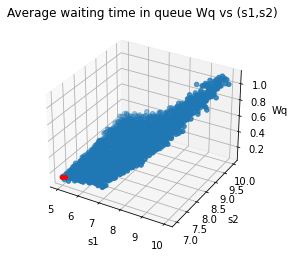

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xn,yn,zn,zorder=1)
for val in min_idx:
    idx=val.item()
    ax.plot(xn[idx],yn[idx],zn[idx].item(),markersize=4,marker='o',color='red',zorder=10)
ax.set_xlabel("s1")
ax.set_ylabel("s2")
ax.set_zlabel("Wq")
ax.set_title("Average waiting time in queue Wq vs (s1,s2)")